# Inverse Linear Transformations and Matrix Inverses in Linear Algebra for AI/ML

## Introduction and Relevance
**Definition**: An inverse linear transformation reverses the effect of a given linear transformation, mapping the output back to the original input. In matrix algebra, this is represented by the matrix inverse, which undoes the transformation defined by a matrix. These concepts are critical in AI/ML for solving linear systems, recovering original data, and analyzing transformations.

**Mathematical Definition**:
- A linear transformation $T: V \to V$ (where $V$ is a vector space, typically $\mathbb{R}^n$) is **invertible** if there exists $T^{-1}: V \to V$ such that:
  $$
  T^{-1} \circ T = \text{id}_V \quad \text{and} \quad T \circ T^{-1} = \text{id}_V
  $$
  where $\text{id}_V$ is the identity transformation ($\text{id}_V(\mathbf{v}) = \mathbf{v}$).
- For $T: \mathbb{R}^n \to \mathbb{R}^n$ represented by a square matrix $\mathbf{A} \in \mathbb{R}^{n \times n}$ (i.e., $T(\mathbf{x}) = \mathbf{A} \mathbf{x}$), the **matrix inverse** $\mathbf{A}^{-1}$ satisfies:
  $$
  \mathbf{A} \mathbf{A}^{-1} = \mathbf{I} \quad \text{and} \quad \mathbf{A}^{-1} \mathbf{A} = \mathbf{I}
  $$
  where $\mathbf{I}$ is the $n \times n$ identity matrix.
- A matrix $\mathbf{A}$ is invertible if and only if $\det(\mathbf{A}) \neq 0$, corresponding to a bijective linear transformation.

**Geometric Interpretation**: The inverse transformation $T^{-1}$ (or matrix $\mathbf{A}^{-1}$) reverses the effect of $T$, mapping transformed vectors back to their original positions (e.g., undoing a rotation or scaling).

**Examples**:
- For $\mathbf{A} = \begin{bmatrix} 2 & 0 \\ 0 & 3 \end{bmatrix}$, the inverse is $\mathbf{A}^{-1} = \begin{bmatrix} \frac{1}{2} & 0 \\ 0 & \frac{1}{3} \end{bmatrix}$, reversing the scaling by 2 and 3 along the axes.
- In ML, the inverse of a standardization matrix recovers original data from normalized features.

**Relevance in Mathematics**:
- **System Solving**: Solve linear systems $\mathbf{A} \mathbf{x} = \mathbf{b}$ as $\mathbf{x} = \mathbf{A}^{-1} \mathbf{b}$.
- **Transformation Reversal**: Undo operations like rotations or scaling.
- **Matrix Analysis**: Analyze properties like eigenvalues, rank, and determinant.
- **Stability Analysis**: Ensure transformations are reversible and well-conditioned.

**Relevance in AI/ML**:
- **Solve Linear Systems**: Enable analytical solutions in linear regression or Gaussian processes.
- **Reverse Transformations**: Recover original data after preprocessing.
- **Support Optimization**: Facilitate gradient-based updates by ensuring invertibility.
- **Analyze Models**: Provide insights into transformation stability in neural networks.

**Applications Overview**:
- **Linear Regression**: Use matrix inverses in the normal equation.
- **Gaussian Processes**: Compute inverses of covariance matrices.
- **Data Preprocessing**: Reverse transformations like standardization.
- **Computer Vision**: Recover original coordinates after transformations.
- **Numerical Stability**: Use pseudoinverses for non-invertible cases.
- **Control Theory**: Model system dynamics in reinforcement learning.

## Core Concepts and Derivations
This section covers the computation of matrix inverses, their properties, invertibility of linear transformations, and numerical considerations, with examples, derivations, and visualizations.

### 2.1 Computation of Matrix Inverses
**Definition**: The inverse of a square matrix $\mathbf{A}$ can be computed using:
- **Adjugate Method**: $\mathbf{A}^{-1} = \frac{1}{\det(\mathbf{A})} \cdot \text{adj}(\mathbf{A})$, where $\text{adj}(\mathbf{A})$ is the transpose of the cofactor matrix.
- **Gaussian Elimination**: Row reduce $[\mathbf{A} | \mathbf{I}]$ to $[\mathbf{I} | \mathbf{A}^{-1}]$.
- **LU Decomposition**: If $\mathbf{A} = \mathbf{L} \mathbf{U}$, solve for $\mathbf{A}^{-1}$ using forward and backward substitution.

**Explanation**: These methods compute the matrix that reverses $\mathbf{A} \mathbf{x}$. The determinant check ($\det(\mathbf{A}) \neq 0$) ensures invertibility.

**Derivation (2x2 Matrix)**: For $\mathbf{A} = \begin{bmatrix} a & b \\ c & d \end{bmatrix}$, the inverse is:
  $$
  \mathbf{A}^{-1} = \frac{1}{ad - bc} \begin{bmatrix} d & -b \\ -c & a \end{bmatrix}
  $$
  where $ad - bc = \det(\mathbf{A})$.

**Why Necessary**:
- **System Solving**: Enables analytical solutions like $\mathbf{x} = \mathbf{A}^{-1} \mathbf{b}$.
- **Data Recovery**: Reverses transformations in ML preprocessing.
- **Model Analysis**: Provides insights into transformation properties.
- **Algorithm Efficiency**: Supports closed-form solutions in ML algorithms.

**Example**: For $\mathbf{A} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$, $\det(\mathbf{A}) = -2$, so $\mathbf{A}^{-1} = \frac{1}{-2} \begin{bmatrix} 4 & -2 \\ -3 & 1 \end{bmatrix}$.

**ML Use-Case**: In linear regression, the normal equation uses $(\mathbf{X}^T \mathbf{X})^{-1}$ to compute weights.

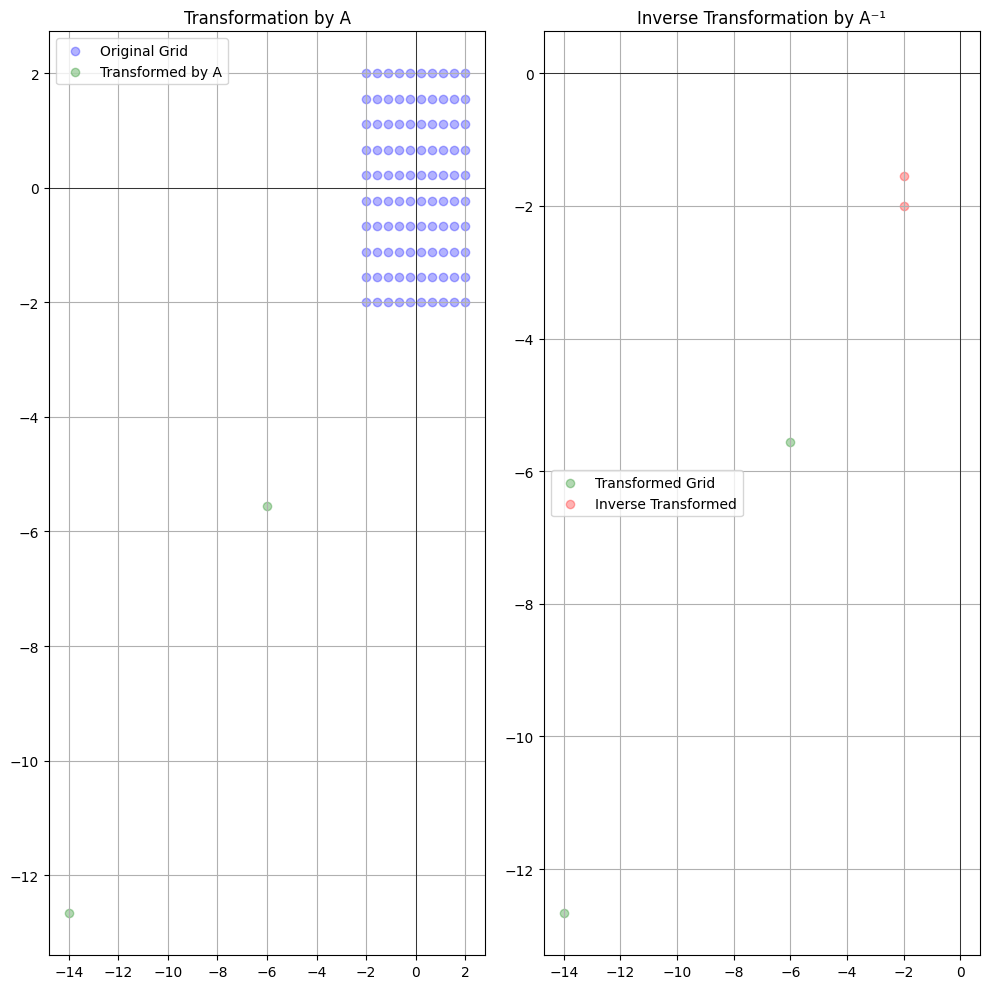

Matrix A:
 [[1 2]
 [3 4]]
Determinant of A: -2.0000000000000004
Inverse of A:
 [[-2.   1. ]
 [ 1.5 -0.5]]
A * A⁻¹:
 [[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]


In [7]:
# Matrix Inverse Computation and Visualization
import numpy as np
import matplotlib.pyplot as plt

# Define matrix
A = np.array([[1, 2], [3, 4]])
det_A = np.linalg.det(A)

# Compute inverse
if det_A != 0:
    A_inv = np.linalg.inv(A)

# Visualize transformation and inverse
def transform_grid(A, points):
    return A @ points

x = np.linspace(-2, 2, 10)
y = np.linspace(-2, 2, 10)
X, Y = np.meshgrid(x, y)
points = np.vstack([X.ravel(), Y.ravel()])
transformed_points = transform_grid(A, points)
inverse_transformed = transform_grid(A_inv, transformed_points) if det_A != 0 else points

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.scatter(points[0], points[1], c='blue', alpha=0.3, label='Original Grid')
plt.scatter(transformed_points[:, 0], transformed_points[:, 1], c='green', alpha=0.3, label='Transformed by A')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Transformation by A')
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(transformed_points[:, 0], transformed_points[:, 1], c='green', alpha=0.3, label='Transformed Grid')
plt.scatter(inverse_transformed[:, 0], inverse_transformed[:, 1], c='red', alpha=0.3, label='Inverse Transformed')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Inverse Transformation by A⁻¹')
plt.legend()
plt.tight_layout()
plt.show()

print("Matrix A:\n", A)
print("Determinant of A:", det_A)
print("Inverse of A:\n", A_inv if det_A != 0 else "Not invertible")
print("A * A⁻¹:\n", np.dot(A, A_inv) if det_A != 0 else "Not computed")

### 2.2 Properties of Inverse Linear Transformations and Matrix Inverses
**Definition**: Key properties include:
- **Uniqueness**: If $\mathbf{A}$ is invertible, $\mathbf{A}^{-1}$ is unique.
- **Product of Inverses**: For invertible $\mathbf{A}$ and $\mathbf{B}$, $(\mathbf{A} \mathbf{B})^{-1} = \mathbf{B}^{-1} \mathbf{A}^{-1}$.
- **Transpose of Inverse**: $(\mathbf{A}^{-1})^T = (\mathbf{A}^T)^{-1}$.
- **Determinant**: $\det(\mathbf{A}^{-1}) = \frac{1}{\det(\mathbf{A})}$.
- **Eigenvalues**: If $\lambda$ is an eigenvalue of $\mathbf{A}$, then $\frac{1}{\lambda}$ is an eigenvalue of $\mathbf{A}^{-1}$.
- **Orthogonal Matrices**: If $\mathbf{A}$ is orthogonal ($\mathbf{A}^T \mathbf{A} = \mathbf{I}$), then $\mathbf{A}^{-1} = \mathbf{A}^T$.

**Explanation**: These properties ensure predictable behavior of inverses, simplifying computations and maintaining stability.

**Why Necessary**:
- **Consistent Reversal**: Ensures transformations can be undone correctly in ML workflows.
- **Algorithm Simplification**: Properties like the product rule simplify multi-layer transformations.
- **Numerical Stability**: Orthogonal matrices simplify inverses, reducing errors.
- **Model Insights**: Eigenvalue properties reveal transformation scaling behavior.

**Example**: For $\mathbf{A} = \begin{bmatrix} \cos \theta & -\sin \theta \\ \sin \theta & \cos \theta \end{bmatrix}$ (rotation matrix), $\mathbf{A}^{-1} = \mathbf{A}^T$.

**ML Use-Case**: In PCA, orthogonal matrices simplify projections since their inverses are transposes.

In [ ]:
# Properties of Matrix Inverses
import numpy as np

# Define matrix
A = np.array([[1, 2], [3, 4]])
det_A = np.linalg.det(A)

# Verify properties
if det_A != 0:
    A_inv = np.linalg.inv(A)
    I = np.dot(A, A_inv)  # Should be identity
    det_A_inv = np.linalg.det(A_inv)
    eig_vals_A = np.linalg.eigvals(A)
    eig_vals_A_inv = np.linalg.eigvals(A_inv)

    print("A * A⁻¹:\n", I)
    print("Determinant of A⁻¹:", det_A_inv, "1/det(A):", 1/det_A)
    print("Eigenvalues of A:\n", eig_vals_A)
    print("Eigenvalues of A⁻¹:\n", eig_vals_A_inv)
else:
    print("Matrix is not invertible.")

### 2.3 Invertibility and Linear Transformations
**Definition**: A linear transformation $T: \mathbb{R}^n \to \mathbb{R}^n$ is invertible if it is bijective (one-to-one and onto), equivalent to its matrix $\mathbf{A}$ having $\det(\mathbf{A}) \neq 0$, rank $n$, and trivial kernel ($\ker(T) = \{\mathbf{0}\}$).

**Explanation**: Invertibility ensures the transformation preserves all information, allowing inputs to be recovered uniquely from outputs.

**Why Necessary**:
- **Reversibility**: Critical for undoing transformations in ML preprocessing.
- **Unique Solutions**: Ensures unique solutions in linear systems.
- **Data Integrity**: Preserves information in transformations.
- **Model Stability**: Non-singular matrices ensure robust computations.

**Example**: For $\mathbf{A} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$, $\det(\mathbf{A}) = -2 \neq 0$, so invertible.

**ML Use-Case**: In linear regression, $\mathbf{X}^T \mathbf{X}$ must be invertible for the normal equation.

In [ ]:
# Invertibility Check with Kernel Visualization
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import null_space

# Define matrix
A = np.array([[1, 2], [3, 4]])
det_A = np.linalg.det(A)
rank_A = np.linalg.matrix_rank(A)
kernel = null_space(A)

# Visualize kernel
plt.figure(figsize=(6, 6))
if kernel.size > 0:
    k_v = kernel[:, 0] * 2
    plt.plot([-k_v[0], k_v[0]], [-k_v[1], k_v[1]], 'r-', label='Kernel')
else:
    plt.scatter([0], [0], color='red', label='Trivial Kernel {0}')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Kernel of Matrix A (Invertible if Trivial)')
plt.legend()
plt.show()

print("Determinant of A:", det_A)
print("Rank of A:", rank_A)
print("Kernel basis:\n", kernel if kernel.size > 0 else "Trivial {0}")
print("Invertible?:", det_A != 0 and rank_A == A.shape[0])

### 2.4 Numerical Considerations
**Definition**: Computing matrix inverses can be numerically unstable for ill-conditioned matrices (e.g., near-singular matrices with small determinants).

**Explanation**: Small changes in matrix elements can lead to large errors in the inverse, especially in high-dimensional ML applications.

**Why Necessary**:
- **Robust Computations**: Avoid direct inversion in favor of iterative methods or pseudoinverses.
- **Handling Non-Invertible Cases**: Use pseudoinverses for singular or non-square matrices.
- **Regularization**: Add small constants to ensure invertibility (e.g., ridge regression).
- **Scalability**: Ensure stability in large-scale ML problems.

**Example**: For a near-singular matrix, the pseudoinverse provides a stable alternative.

**ML Use-Case**: In ridge regression, $(\mathbf{X}^T \mathbf{X} + \lambda \mathbf{I})^{-1}$ ensures invertibility.

In [2]:
# Numerical Considerations with Pseudoinverse
import numpy as np

# Define singular matrix
A_singular = np.array([[1, 2], [2, 4]])
det_A = np.linalg.det(A_singular)
A_pinv = np.linalg.pinv(A_singular)

print("Singular Matrix A:\n", A_singular)
print("Determinant of A:", det_A)
print("Pseudoinverse of A:\n", A_pinv)
print("A * A_pinv:\n", np.dot(A_singular, A_pinv))  # Not identity, but closest approximation

Singular Matrix A:
 [[1 2]
 [2 4]]
Determinant of A: 0.0
Pseudoinverse of A:
 [[0.04 0.08]
 [0.08 0.16]]
A * A_pinv:
 [[0.2 0.4]
 [0.4 0.8]]


## Applications in AI/ML
Inverse linear transformations and matrix inverses are applied in various ML tasks:
- **Linear Regression**: Use matrix inverses in the normal equation.
- **Gaussian Processes**: Compute inverses of covariance matrices.
- **Data Preprocessing**: Reverse transformations like standardization.
- **Computer Vision**: Recover original coordinates after transformations.
- **Numerical Stability**: Use pseudoinverses for non-invertible cases.
- **Control Theory**: Model system dynamics in reinforcement learning.

## Practical ML Examples
Below are coded examples demonstrating matrix inverses in ML contexts.

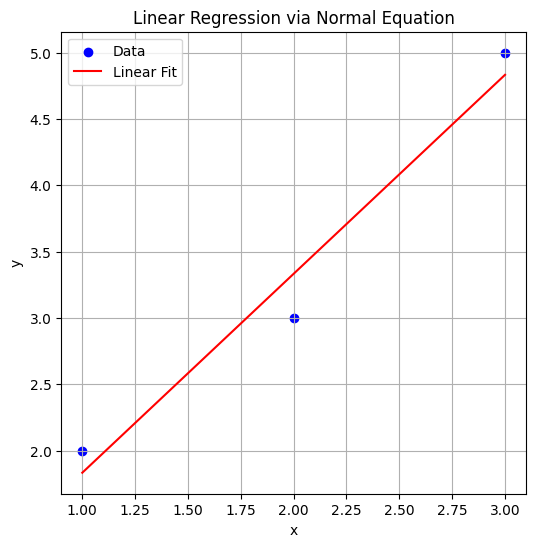

Weights (w): [0.33333333 1.5       ]


In [3]:
# Example 1: Linear Regression (Normal Equation)
import numpy as np
import matplotlib.pyplot as plt

# Simulate data
X = np.array([[1, 1], [1, 2], [1, 3]])  # Feature matrix with bias term
y = np.array([2, 3, 5])  # Target values

# Normal equation
XtX = np.dot(X.T, X)
det_XtX = np.linalg.det(XtX)
if det_XtX != 0:
    w = np.dot(np.linalg.inv(XtX), np.dot(X.T, y))

    # Visualize
    plt.figure(figsize=(6, 6))
    plt.scatter(X[:, 1], y, color='blue', label='Data')
    x_vals = np.array([1, 3])
    y_vals = w[0] + w[1] * x_vals
    plt.plot(x_vals, y_vals, 'r-', label='Linear Fit')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.title('Linear Regression via Normal Equation')
    plt.legend()
    plt.show()

    print("Weights (w):", w)
else:
    print("XtX is singular, cannot compute weights.")

In [4]:
# Example 2: Data Preprocessing (Reversing Standardization)
import numpy as np

# Simulate data
data = np.array([[1, 2], [3, 4], [5, 6]])

# Standardize
mean = np.mean(data, axis=0)
std = np.std(data, axis=0)
standardized_data = (data - mean) / std

# Inverse transformation
original_data = standardized_data * std + mean

print("Original Data:\n", data)
print("Standardized Data:\n", standardized_data)
print("Recovered Data:\n", original_data)

Original Data:
 [[1 2]
 [3 4]
 [5 6]]
Standardized Data:
 [[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]
Recovered Data:
 [[1. 2.]
 [3. 4.]
 [5. 6.]]


## Summary
- **Key Concepts**: Inverse linear transformations reverse transformations, represented by matrix inverses, requiring $\det(\mathbf{A}) \neq 0$, full rank, and trivial kernel.
- **Mathematical Significance**: Solve systems, reverse transformations, and analyze matrix properties.
- **AI/ML Relevance**: Enable analytical solutions, data recovery, and stable computations.
- **Next Steps**: Practice computing inverses, solving linear systems, and applying inverses in ML tasks.

## Tips and Practice
- **Visualize**: Use Matplotlib (as shown) or GeoGebra (https://www.geogebra.org/) to visualize matrix transformations and their inverses.
- **Practice Problems**:
  1. Compute the inverse of $\begin{bmatrix} 2 & 1 \\ 1 & 3 \end{bmatrix}$.
  2. Check if $\begin{bmatrix} 1 & 2 \\ 2 & 4 \end{bmatrix}$ is invertible and compute its pseudoinverse if not.
  3. Solve $\mathbf{A} \mathbf{x} = \begin{bmatrix} 1 \\ 2 \end{bmatrix}$ for $\mathbf{A} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$ using the inverse.
- **Project Idea**: Implement linear regression using the normal equation and visualize the fit.
- **Resources**:
  - *Book*: “Linear Algebra and Its Applications” by Gilbert Strang.
  - *Online*: 3Blue1Brown’s “Essence of Linear Algebra” (YouTube, matrix inverse video), Khan Academy’s Linear Algebra course.
  - *Practice*: MIT OpenCourseWare (18.06 Linear Algebra), NumPy tutorials on Real Python.

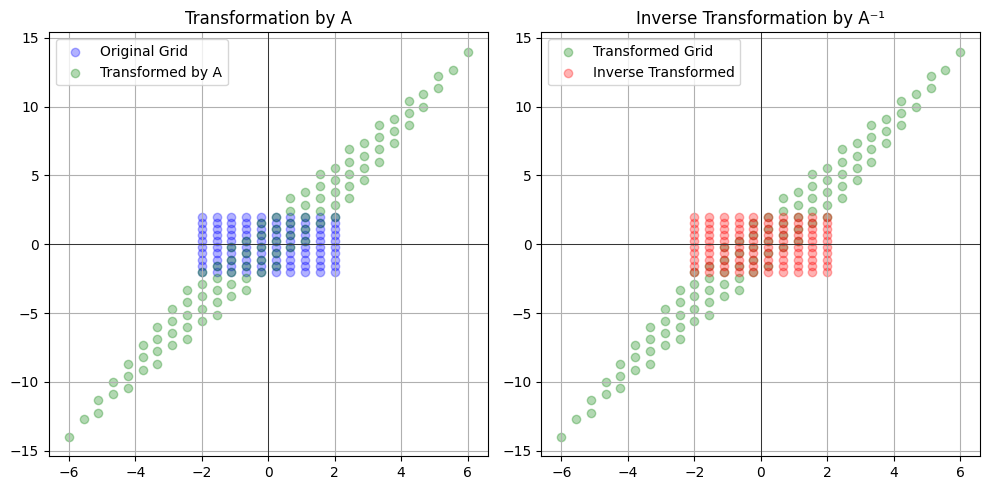

Matrix A:
 [[1 2]
 [3 4]]
Inverse of A:
 [[-2.   1. ]
 [ 1.5 -0.5]]
A * A⁻¹:
 [[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]


In [6]:
# Experimentation Zone
# Try defining your own matrix and exploring its inverse properties!
import numpy as np
import matplotlib.pyplot as plt

# Define matrix
A = np.array([[1, 2], [3, 4]])  # You can change these values
det_A = np.linalg.det(A)

# Compute inverse
if det_A != 0:
    A_inv = np.linalg.inv(A)

    # Function to transform a grid of points
    def transform_grid(A, points):
        return A @ points  # points shape: (2, N)

    # Create a grid of points
    x = np.linspace(-2, 2, 10)
    y = np.linspace(-2, 2, 10)
    X, Y = np.meshgrid(x, y)
    points = np.vstack([X.ravel(), Y.ravel()])  # shape (2, N)

    # Apply transformation and inverse
    transformed_points = transform_grid(A, points)
    inverse_transformed = transform_grid(A_inv, transformed_points)

    # Visualization
    plt.figure(figsize=(10, 5))

    # Transformation by A
    plt.subplot(1, 2, 1)
    plt.scatter(points[0], points[1], c='blue', alpha=0.3, label='Original Grid')
    plt.scatter(transformed_points[0], transformed_points[1], c='green', alpha=0.3, label='Transformed by A')
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.title('Transformation by A')
    plt.legend()

    # Inverse Transformation
    plt.subplot(1, 2, 2)
    plt.scatter(transformed_points[0], transformed_points[1], c='green', alpha=0.3, label='Transformed Grid')
    plt.scatter(inverse_transformed[0], inverse_transformed[1], c='red', alpha=0.3, label='Inverse Transformed')
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.title('Inverse Transformation by A⁻¹')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Print matrices
    print("Matrix A:\n", A)
    print("Inverse of A:\n", A_inv)
    print("A * A⁻¹:\n", np.dot(A, A_inv))

else:
    print("Matrix is not invertible.")
